In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
import keras.backend as K

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.


In [2]:
!ls -l trained_model/

合計 106716
-rw-rw-r-- 1 uchiumi uchiumi   761336  6月 26 00:27 lenet5_mnist.h5
-rw-rw-r-- 1 uchiumi uchiumi  7264736  6月 10 11:56 trained_cnn_v0.h5
-rw-rw-r-- 1 uchiumi uchiumi  4965880  6月  9 23:35 vae_mnist.h5
-rw-rw-r-- 1 uchiumi uchiumi 23147968  6月 11 02:36 vae_stl10_epoch100.h5
-rw-rw-r-- 1 uchiumi uchiumi 73127096  6月 11 14:02 vgg16_stl10_v0.h5


In [3]:
from stl10_utils import read_all_images, read_labels
from tensorflow.python.keras import utils

x_train = read_all_images("./dataset/STL10/data/stl10_binary/train_X.bin")
y_train = read_labels("./dataset/STL10/data/stl10_binary/train_y.bin")

x_train = x_train.astype('float32') / 255.
y_train = utils.np_utils.to_categorical(y_train-1, 10) # Ohe-Hot encoding

# x_train (5000, 96, 96, 3)
# x_test (8000, 96, 96, 3)
# y_train (5000,)
# y_test (8000,)

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


In [4]:
!nvidia-smi

Fri Jun 26 01:50:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0 Off |                  N/A |
| 34%   43C    P8    11W / 200W |   7980MiB /  8118MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
with keras.utils.CustomObjectScope({'GlorotUniform': keras.initializers.glorot_uniform()}):
    model = keras.models.load_model('trained_model/vgg16_stl10_v0.h5', compile=False)
    model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


ResourceExhaustedError: OOM when allocating tensor with shape[3,3,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node block5_conv1/kernel/Initializer/random_uniform/RandomUniform (defined at <ipython-input-5-f72c757cf8c6>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'block5_conv1/kernel/Initializer/random_uniform/RandomUniform', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/uchiumi/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-f72c757cf8c6>", line 2, in <module>
    model = keras.models.load_model('trained_model/vgg16_stl10_v0.h5', compile=False)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/saving.py", line 234, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/saving.py", line 324, in model_from_config
    return deserialize(config, custom_objects=custom_objects)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/layers/serialization.py", line 74, in deserialize
    printable_module_name='layer')
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/utils/generic_utils.py", line 192, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/network.py", line 1273, in from_config
    process_node(layer, node_data)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/network.py", line 1231, in process_node
    layer(input_tensors[0], **kwargs)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 538, in __call__
    self._maybe_build(inputs)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 1603, in _maybe_build
    self.build(input_shapes)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/layers/convolutional.py", line 165, in build
    dtype=self.dtype)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 349, in add_weight
    aggregation=aggregation)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/training/checkpointable/base.py", line 607, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer_utils.py", line 145, in make_variable
    aggregation=aggregation)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2488, in default_variable_creator
    import_scope=import_scope)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 294, in __init__
    constraint=constraint)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 406, in _init_from_args
    initial_value() if init_from_fn else initial_value,
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer_utils.py", line 127, in <lambda>
    shape, dtype=dtype, partition_info=partition_info)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py", line 512, in __call__
    shape, -limit, limit, dtype, seed=self.seed)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 247, in random_uniform
    rnd = gen_random_ops.random_uniform(shape, dtype, seed=seed1, seed2=seed2)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 777, in random_uniform
    name=name)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/uchiumi/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[3,3,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node block5_conv1/kernel/Initializer/random_uniform/RandomUniform (defined at <ipython-input-5-f72c757cf8c6>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



# Eval

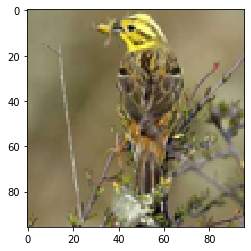

In [6]:
idx=0
plt.imshow(x_train[idx].reshape(96,96,3))
plt.show()

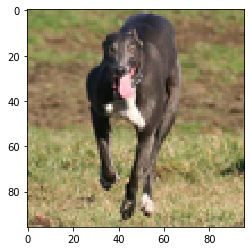

In [7]:
idx=1
plt.imshow(x_train[idx].reshape(96,96,3))
plt.show()


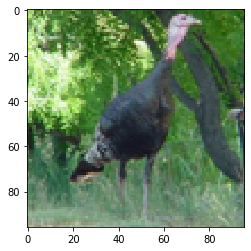

In [8]:
idx=2 
plt.imshow(x_train[idx].reshape(96,96,3))
plt.show()


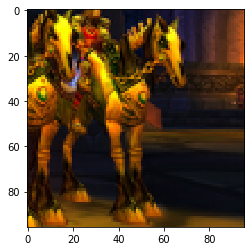

In [9]:
idx=3
plt.imshow(x_train[idx].reshape(96,96,3))
plt.show()


# Experiments 0623

In [10]:
idx = 1

x_true = x_train[idx].reshape(1, 96, 96, 3)
y_true = y_train[idx].reshape(1, 10)
y_pred = model.output

init = tf.global_variables_initializer()
loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
get_grad = K.gradients(loss, model.input)

sess = K.get_session()
sess.run(init)
gradient = sess.run(get_grad[0], feed_dict={model.input: x_true})

gradient = np.squeeze(gradient)
print("gradient.shape: ", gradient.shape)

Instructions for updating:
Use tf.cast instead.
gradient.shape:  (96, 96, 3)


In [26]:
gradient_gray = np.mean(gradient, axis=2)
gradient_gray.shape

(96, 96)

In [29]:
hessian_matrix_gray = np.outer(gradient_gray, gradient_gray)
hessian_matrix_gray.shape

(9216, 9216)

In [30]:
def calc_max_eig_vector(matrix):
    eig_values, eig_vectors = np.linalg.eigh(matrix)
    
    eig_values = eig_values.astype(np.float32)
    eig_vectors = eig_vectors.astype(np.float32)

    for i in tqdm(range(len(eig_vectors))):
        eig_vectors[i] = eig_vectors[i] / np.linalg.norm(eig_vectors[i], ord=2)

    # max_eig_vector = eig_vectors[np.argmax(eig_values)]
    # return max_eig_vector
    # return max_eig_vector, eig_values.max()

    return eig_values, eig_vectors

In [31]:
%%time
eig_values, eig_vectors = calc_max_eig_vector(hessian_matrix_gray)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



CPU times: user 9min 51s, sys: 28.6 s, total: 10min 20s
Wall time: 1min 20s


In [33]:
eig_values

array([-2.2417096e-17, -2.1277630e-17, -2.0071054e-17, ...,
        2.1512700e-17,  2.2257571e-17,  1.2732498e-08], dtype=float32)

In [32]:
eig_vectors

array([[ 4.2992065e-04, -9.1680078e-05,  5.0006935e-04, ...,
        -5.9742961e-06,  9.7576143e-05,  9.5032103e-04],
       [ 8.3700323e-04,  9.7918863e-05, -4.1841151e-04, ...,
         1.0476216e-03, -5.6820991e-04,  7.4529555e-04],
       [ 4.0166936e-04, -7.4901116e-05,  4.3622885e-04, ...,
         1.1821947e-04,  2.8624455e-04,  5.5795594e-04],
       ...,
       [ 2.5465011e-04,  9.8877055e-05,  1.1079298e-04, ...,
        -5.0095044e-04,  3.4074803e-04, -4.9235363e-04],
       [-3.3754960e-04, -1.0333739e-03, -5.4873590e-04, ...,
         1.3640454e-03, -5.5600837e-04,  1.8421366e-03],
       [ 5.0117541e-04, -1.0994731e-03, -6.6527264e-04, ...,
        -6.7083852e-04, -4.1253073e-04,  1.0073488e-03]], dtype=float32)

# Experiments

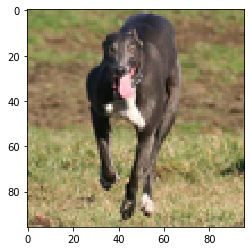

In [136]:
idx = 1
plt.imshow(x_train[idx].reshape(96,96,3))
plt.show()

In [137]:
idx = 1

x_true = x_train[idx].reshape(1, 96, 96, 3)
y_true = y_train[idx].reshape(1, 10)
y_pred = model.output

init = tf.global_variables_initializer()
loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
get_grad = K.gradients(loss, model.input)

sess = K.get_session()
sess.run(init)
gradient = sess.run(get_grad[0], feed_dict={model.input: x_true})

gradient = np.squeeze(gradient)
gradient.shape

(96, 96, 3)

In [138]:
gradient_r = gradient[:,:,0].reshape(-1)
gradient_g = gradient[:,:,1].reshape(-1)
gradient_b = gradient[:,:,2].reshape(-1)

hessian_matrix_r = np.outer(gradient_r, gradient_r)
hessian_matrix_g = np.outer(gradient_g, gradient_g)
hessian_matrix_b = np.outer(gradient_b, gradient_b)

print("gradient_r : ", gradient_r.shape)
print("hessian_matrix_r : ", hessian_matrix_r.shape)

gradient_r :  (9216,)
hessian_matrix_r :  (9216, 9216)


(9216, 9216)


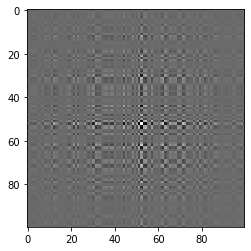

In [140]:
print(hessian_matrix_r.shape)

plt.imshow(hessian_matrix_r[0:100, 0:100], "gray")
plt.show()

Gradient (R)


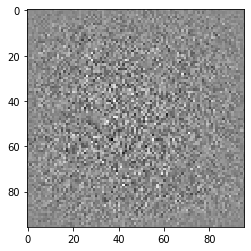

Gradient (G)


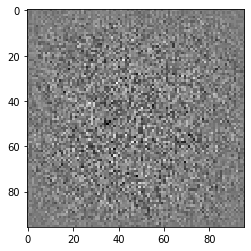

Gradient (B)


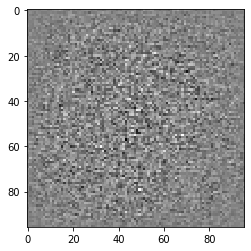

In [141]:
# Gradient

print("Gradient (R)")
plt.imshow(gradient_r.reshape(96, 96), "gray")
plt.show()

print("Gradient (G)")
plt.imshow(gradient_g.reshape(96, 96), "gray")
plt.show()

print("Gradient (B)")
plt.imshow(gradient_b.reshape(96, 96), "gray")
plt.show()

Hessian diag (R)


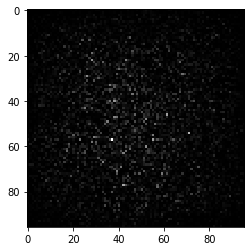

Hessian diag (G)


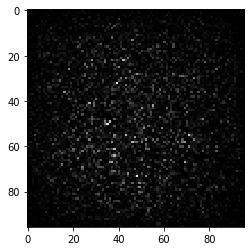

Hessian diag (B)


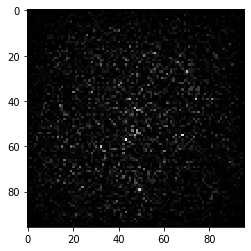

In [142]:
# Hessian (diag)

print("Hessian diag (R)")
plt.imshow(np.diag(hessian_matrix_r).reshape(96,96) , "gray")
plt.show()

print("Hessian diag (G)")
plt.imshow(np.diag(hessian_matrix_g).reshape(96,96) , "gray")
plt.show()

print("Hessian diag (B)")
plt.imshow(np.diag(hessian_matrix_b).reshape(96,96) , "gray")
plt.show()

In [143]:
x_true_r = np.squeeze(x_true)[:, :, 0].reshape(96,96)
x_true_g = np.squeeze(x_true)[:, :, 1].reshape(96,96)
x_true_b = np.squeeze(x_true)[:, :, 2].reshape(96,96)

Original (RGB)


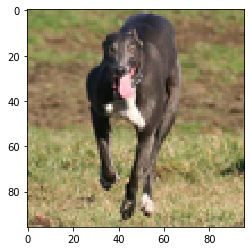

Original (R)


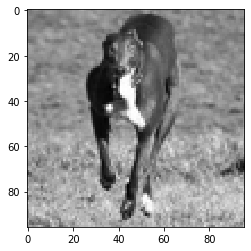

Original (G)


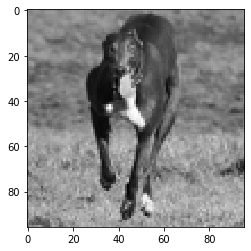

Original (B)


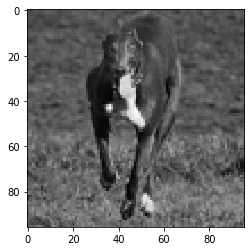

In [144]:
# Original

print("Original (RGB)")
plt.imshow(x_true.reshape(96,96,3))
plt.show()

# Original (R)

print("Original (R)")
plt.imshow(x_true_r, "gray")
plt.show()

# Original (G)

print("Original (G)")
plt.imshow(x_true_g, "gray")
plt.show()

# Original (B)

print("Original (B)")
plt.imshow(x_true_b, "gray")
plt.show()

In [86]:
def calc_max_eig_vector(matrix):
    eig_values, eig_vectors = np.linalg.eigh(matrix)
    
    eig_values = eig_values.astype(np.float32)
    eig_vectors = eig_vectors.astype(np.float32)

    for i in tqdm(range(len(eig_vectors))):
        eig_vectors[i] = eig_vectors[i] / np.linalg.norm(eig_vectors[i], ord=2)

    max_eig_vector = eig_vectors[np.argmax(eig_values)]
    return max_eig_vector, eig_values.max()

In [87]:
%%time

max_v_r, max_e_r = calc_max_eig_vector(hessian_matrix_r)
max_v_g, max_e_g = calc_max_eig_vector(hessian_matrix_g)
max_v_b, max_e_b = calc_max_eig_vector(hessian_matrix_b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



CPU times: user 30min 29s, sys: 1min 31s, total: 32min
Wall time: 4min 9s


In [147]:
def show_image(x_true, max_eig_vector):
    print("Original")

    plt.imshow(x_true, "gray")
    plt.show()

    # maximize FisherInformation

    print("Input to maximize FI (top 100)", max_eig_vector.reshape(96, 96).shape)

    max_fim = max_eig_vector
    max_fim = (max_fim - max_fim.min()) / (max_fim.max() - max_fim.min())
    max_fim = np.where(np.argsort(max_fim) < 500, 1, x_true.reshape(-1))
    plt.imshow(max_fim.reshape(96, 96), "gray")
    plt.show()

    print("Input to maximize FI (full)", max_eig_vector.reshape(96, 96).shape)

    max_fim = max_eig_vector
    max_fim = (max_fim - max_fim.min()) / (max_fim.max() - max_fim.min())
    plt.imshow(max_fim.reshape(96, 96) + x_true_g, "gray")
    plt.show()

    print("Input to maximize FI (full)", max_eig_vector.reshape(96, 96).shape)

    max_fim = max_eig_vector
    max_fim = (max_fim - max_fim.min()) / (max_fim.max() - max_fim.min())
    plt.imshow(max_fim.reshape(96, 96), "gray")
    plt.show()

### R

Original


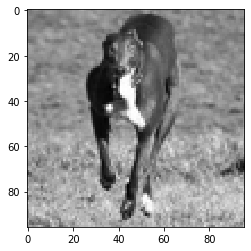

Input to maximize FI (top 100) (96, 96)


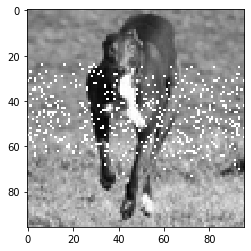

Input to maximize FI (full) (96, 96)


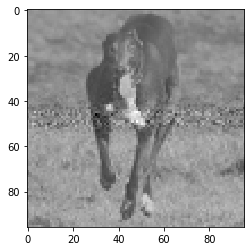

Input to maximize FI (full) (96, 96)


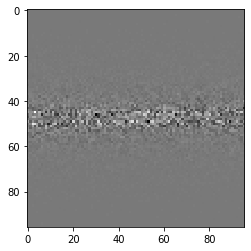

In [148]:
show_image(x_true_r, max_v_r)

Original


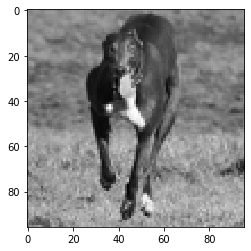

Input to maximize FI (top 100) (96, 96)


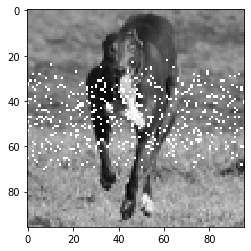

Input to maximize FI (full) (96, 96)


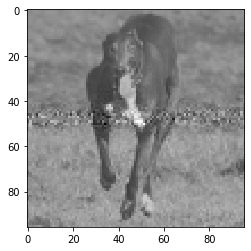

Input to maximize FI (full) (96, 96)


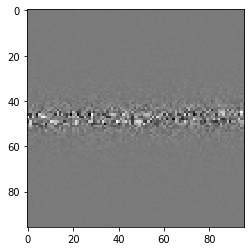

In [149]:
show_image(x_true_g, max_v_g)

Original


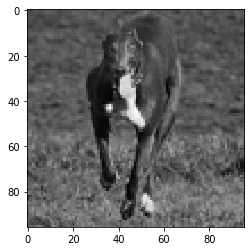

Input to maximize FI (top 100) (96, 96)


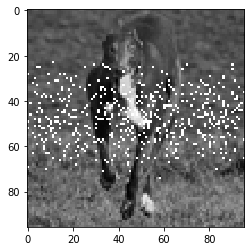

Input to maximize FI (full) (96, 96)


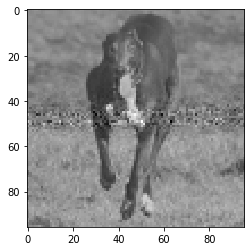

Input to maximize FI (full) (96, 96)


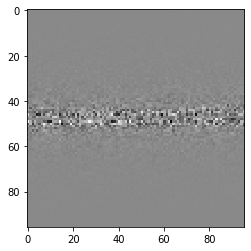

In [150]:
show_image(x_true_b, max_v_b)

# Sample 2

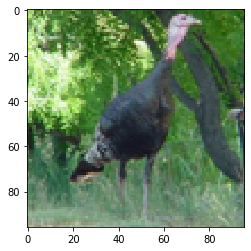

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



CPU times: user 30min 22s, sys: 1min 29s, total: 31min 52s
Wall time: 4min 9s


In [151]:
%%time

idx = 2
plt.imshow(x_train[idx].reshape(96,96,3))
plt.show()

x_true = x_train[idx].reshape(1, 96, 96, 3)
y_true = y_train[idx].reshape(1, 10)
y_pred = model.output

init = tf.global_variables_initializer()
loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
get_grad = K.gradients(loss, model.input)

sess = K.get_session()
sess.run(init)
gradient = sess.run(get_grad[0], feed_dict={model.input: x_true})
gradient = np.squeeze(gradient)

gradient_r = gradient[:,:,0].reshape(-1)
gradient_g = gradient[:,:,1].reshape(-1)
gradient_b = gradient[:,:,2].reshape(-1)

hessian_matrix_r = np.outer(gradient_r, gradient_r)
hessian_matrix_g = np.outer(gradient_g, gradient_g)
hessian_matrix_b = np.outer(gradient_b, gradient_b)

x_true_r = np.squeeze(x_true)[:, :, 0].reshape(96,96)
x_true_g = np.squeeze(x_true)[:, :, 1].reshape(96,96)
x_true_b = np.squeeze(x_true)[:, :, 2].reshape(96,96)

max_v_r, max_e_r = calc_max_eig_vector(hessian_matrix_r)
max_v_g, max_e_g = calc_max_eig_vector(hessian_matrix_g)
max_v_b, max_e_b = calc_max_eig_vector(hessian_matrix_b)

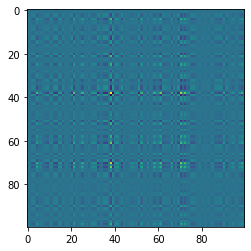

In [152]:
# Hessian

plt.imshow(hessian_matrix_r[0:100, 0:100], "gray")
plt.show()

Gradient (R)


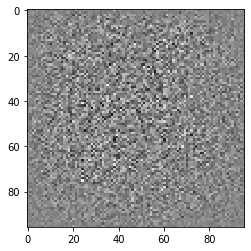

Gradient (G)


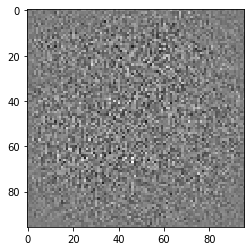

Gradient (B)


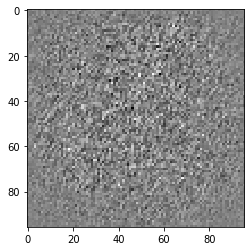

In [153]:
# Gradient

print("Gradient (R)")
plt.imshow(gradient_r.reshape(96, 96) ,"gray")
plt.show()

print("Gradient (G)")
plt.imshow(gradient_g.reshape(96, 96) ,"gray")
plt.show()

print("Gradient (B)")
plt.imshow(gradient_b.reshape(96, 96) ,"gray")
plt.show()

Hessian diag (R)


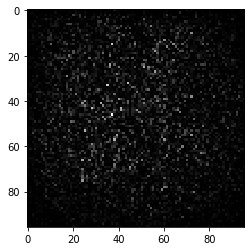

Hessian diag (G)


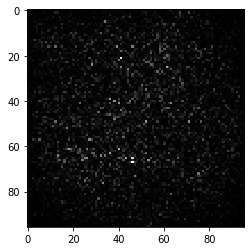

Hessian diag (B)


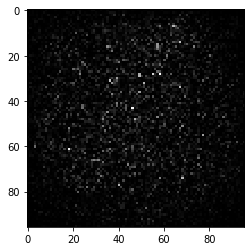

In [154]:
# Hessian (diag)

print("Hessian diag (R)")
plt.imshow(np.diag(hessian_matrix_r).reshape(96,96) ,"gray")
plt.show()

print("Hessian diag (G)")
plt.imshow(np.diag(hessian_matrix_g).reshape(96,96) ,"gray")
plt.show()

print("Hessian diag (B)")
plt.imshow(np.diag(hessian_matrix_b).reshape(96,96) ,"gray")
plt.show()

Original


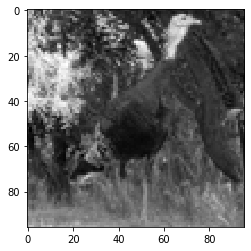

Input to maximize FI (top 100) (96, 96)


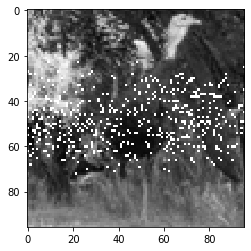

Input to maximize FI (full) (96, 96)


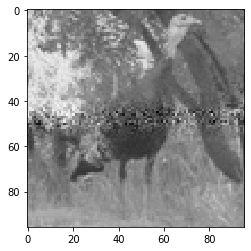

Input to maximize FI (full) (96, 96)


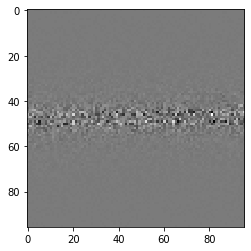

In [155]:
show_image(x_true_r, max_v_r)

Original


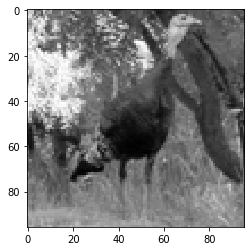

Input to maximize FI (top 100) (96, 96)


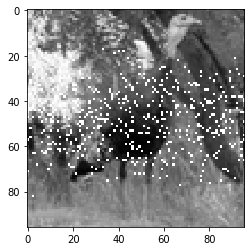

Input to maximize FI (full) (96, 96)


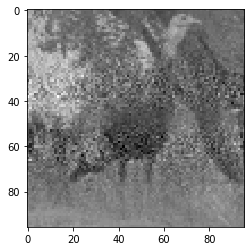

Input to maximize FI (full) (96, 96)


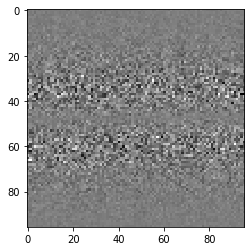

In [156]:
show_image(x_true_g, max_v_g)

Original


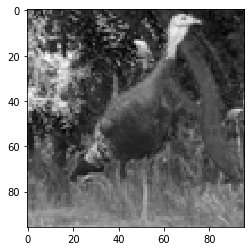

Input to maximize FI (top 100) (96, 96)


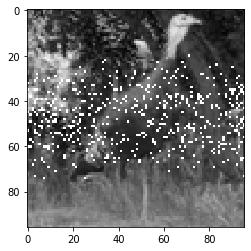

Input to maximize FI (full) (96, 96)


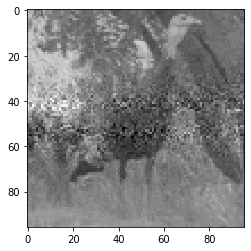

Input to maximize FI (full) (96, 96)


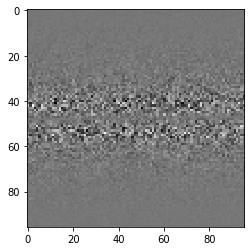

In [157]:
show_image(x_true_b, max_v_b)

# Sample 3

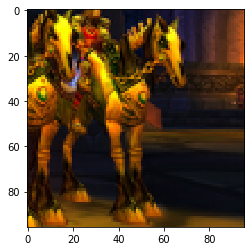

KeyboardInterrupt: 

In [163]:
%%time

idx = 3

x_true = x_train[idx].reshape(1, 96, 96, 3)
y_true = y_train[idx].reshape(1, 10)
y_pred = model.output

plt.imshow(x_true.reshape(96,96,3))
plt.show()

init = tf.global_variables_initializer()
loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
get_grad = K.gradients(loss, model.input)

sess = K.get_session()
sess.run(init)
gradient = sess.run(get_grad[0], feed_dict={model.input: x_true})
gradient = np.squeeze(gradient)

gradient_r = gradient[:,:,0].reshape(-1)
gradient_g = gradient[:,:,1].reshape(-1)
gradient_b = gradient[:,:,2].reshape(-1)

hessian_matrix_r = np.outer(gradient_r, gradient_r)
hessian_matrix_g = np.outer(gradient_g, gradient_g)
hessian_matrix_b = np.outer(gradient_b, gradient_b)

x_true_r = np.squeeze(x_true)[:, :, 0].reshape(96,96)
x_true_g = np.squeeze(x_true)[:, :, 1].reshape(96,96)
x_true_b = np.squeeze(x_true)[:, :, 2].reshape(96,96)

max_v_r, max_e_r = calc_max_eig_vector(hessian_matrix_r)
max_v_g, max_e_g = calc_max_eig_vector(hessian_matrix_g)
max_v_b, max_e_b = calc_max_eig_vector(hessian_matrix_b)

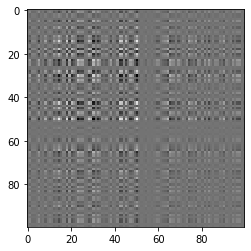

Gradient (R)


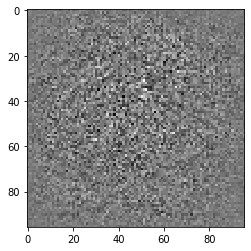

Gradient (G)


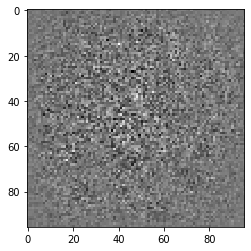

Gradient (B)


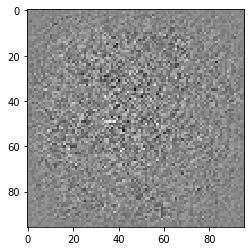

Hessian diag (R)


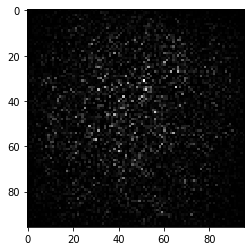

Hessian diag (G)


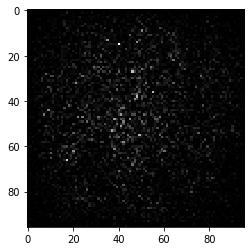

Hessian diag (B)


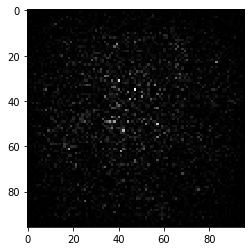

In [159]:
# Hessian

plt.imshow(hessian_matrix_r[0:100, 0:100], "gray")
plt.show()

# Gradient

print("Gradient (R)")
plt.imshow(gradient_r.reshape(96, 96) ,"gray")
plt.show()

print("Gradient (G)")
plt.imshow(gradient_g.reshape(96, 96) ,"gray")
plt.show()

print("Gradient (B)")
plt.imshow(gradient_b.reshape(96, 96) ,"gray")
plt.show()

# Hessian (diag)

print("Hessian diag (R)")
plt.imshow(np.diag(hessian_matrix_r).reshape(96,96) ,"gray")
plt.show()

print("Hessian diag (G)")
plt.imshow(np.diag(hessian_matrix_g).reshape(96,96) ,"gray")
plt.show()

print("Hessian diag (B)")
plt.imshow(np.diag(hessian_matrix_b).reshape(96,96) ,"gray")
plt.show()

Original


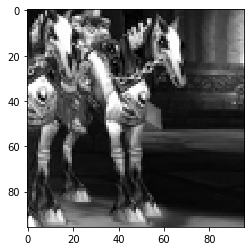

Input to maximize FI (top 100) (96, 96)


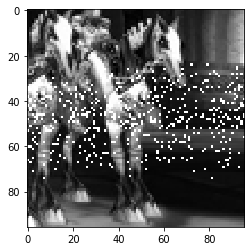

Input to maximize FI (full) (96, 96)


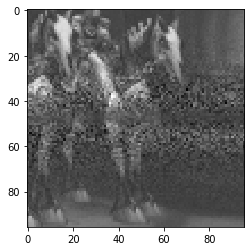

Input to maximize FI (full) (96, 96)


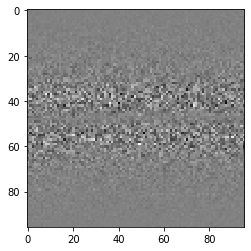

In [160]:
show_image(x_true_r, max_v_r)

Original


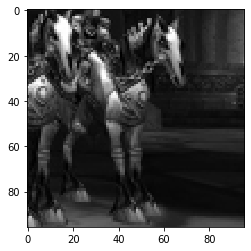

Input to maximize FI (top 100) (96, 96)


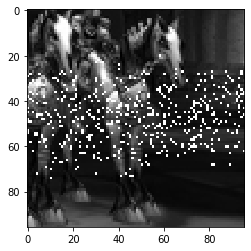

Input to maximize FI (full) (96, 96)


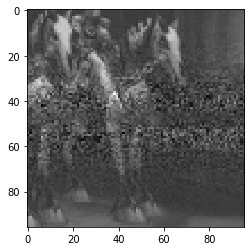

Input to maximize FI (full) (96, 96)


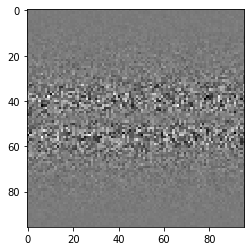

In [161]:
show_image(x_true_g, max_v_g)

Original


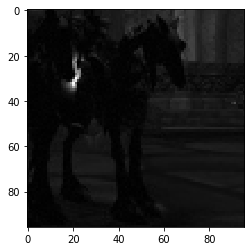

Input to maximize FI (top 100) (96, 96)


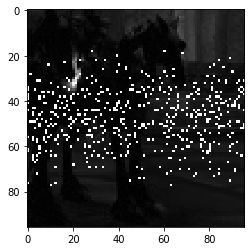

Input to maximize FI (full) (96, 96)


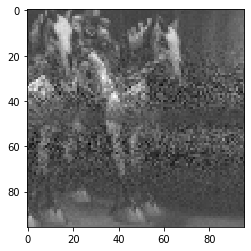

Input to maximize FI (full) (96, 96)


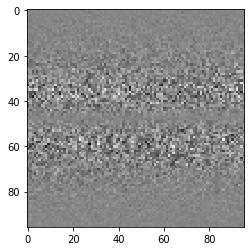

In [162]:
show_image(x_true_b, max_v_b)

In [ ]:
def zscore_gray_image(img):
    img_norm = (img - np.min(img)) / (np.max(img) - np.min(img))
    return img_norm


def zscore_color_image(img):
    img_a = img[:, :, 0]
    img_b = img[:, :, 1]
    img_c = img[:, :, 2]  # Extracting single channels from 3 channel image
    # The above code could also be replaced with cv2.split(img) << which will return 3 numpy arrays (using opencv)

    # normalizing per channel data:
    img_a = (img_a - np.min(img_a)) / (np.max(img_a) - np.min(img_a))
    img_b = (img_b - np.min(img_b)) / (np.max(img_b) - np.min(img_b))
    img_c = (img_c - np.min(img_c)) / (np.max(img_c) - np.min(img_c))

    # putting the 3 channels back together:
    img_norm = numpy.empty(img.shape, dtype=numpy.float32)
    img_norm[:, :, 0] = img_a
    img_norm[:, :, 1] = img_b
    img_norm[:, :, 2] = img_c

    return img_norm